In [11]:
import fTcosmo as cosmo
import loglikefT 
import numpy as np
import matplotlib.pylab as plt
p=0.0054
#popIII, heavy_no_delays, heavy_Q3 
#Catalogs_optimistic, Catalogs_realistic

In [12]:
data = "catalogs_LISA_MBHB_StandSirens/Catalogs_optimistic/heavy_no_delays/cat_6.dat"

In [13]:
test=loglikefT.loglikep(data, priors='flat',p=p)

In [14]:
zmax=max(test.z)
zs=np.linspace(0,zmax,1000)
array=np.zeros(1000)
array2=np.zeros(1000)
H=test.H[0]
om=test.omm[0]
for i, I in enumerate(zs):
    array[i]=cosmo.DGW(I,H,om,p)
    array2[i]=cosmo.DL(I,H,om,0)

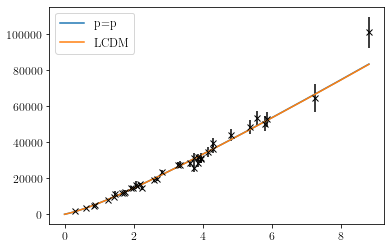

In [15]:
plt.plot(zs,array,label='p=p')
plt.plot(zs, array2, label='LCDM')
plt.errorbar(test.z, test.dL, yerr=test.sigmadL, c='black', fmt="x")
plt.legend()

In [16]:
sampleno, nwalkers=2000, 64


In [ ]:
%%time
test.Sample(sampleno, nwalkers)

In [ ]:
test.ratio()


In [ ]:
test.Corner()

In [ ]:
test.results()
